<a href="https://colab.research.google.com/github/arifmhassan/Azure-DataFactory/blob/master/RetailSales(URL_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

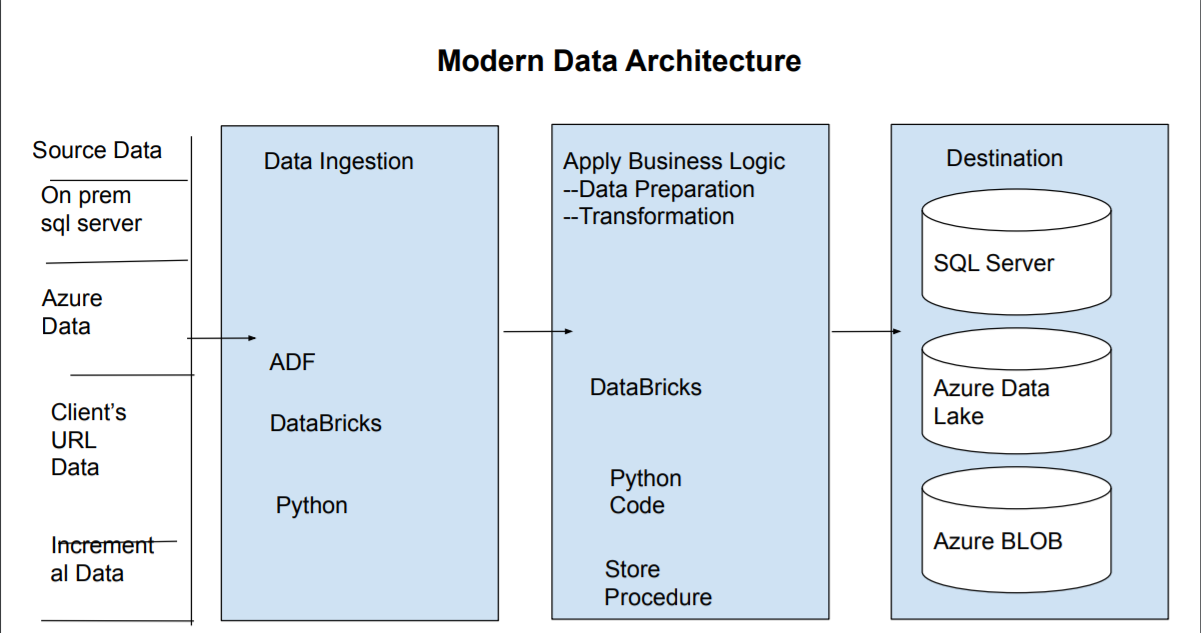![alt text](https://)

Import Data: Store Daily Sales Data

1.   List item
2.   List item



In [0]:
import pandas as pd
Loc_Sales=pd.read_csv('https://raw.githubusercontent.com/arifmhassan/Spark-Python-Data-Ingestion/master/loc%202%20Time%20Period%20Sales.csv')


Define Columns needed

In [0]:
col =(['DOB','Hour','Location','NetSales','GuestCount'])

Loc_Sales.columns=col

In [4]:
Loc_Sales.head()

,DOB,Hour,Location,NetSales,GuestCount
0,6/10/2019,8:00 AM - 8:59 AM,2,10.49,2
1,6/10/2019,9:00 AM - 9:59 AM,2,25,1
2,6/10/2019,11:00 AM - 11:59 AM,2,2,1
3,6/10/2019,3:00 PM - 3:59 PM,2,28.27,6
4,6/10/2019,4:00 PM - 4:59 PM,2,15.67,2


 function to convert currency to float

In [0]:
def convertFloat(x):
  try:
    return float(x)
  except:
    return float(x.replace(',',''))
  



Convert DataFrame data type

In [0]:
Loc_Sales['NetSales']=Loc_Sales['NetSales'].apply(convertFloat)
Loc_Sales['GuestCount']=Loc_Sales['GuestCount'].apply(convertFloat)

In [0]:
Loc_Sales['DOB']=pd.to_datetime(Loc_Sales['DOB'])


In [0]:
Loc_Sales['CheckOpenHr']=Loc_Sales['Hour'].apply(lambda x: x.split('-')[0])
Loc_Sales['CheckEndHr']=Loc_Sales['Hour'].apply(lambda x: x.split('-')[1])

In [11]:
Loc_Sales.head()

,DOB,Hour,Location,NetSales,GuestCount,CheckOpenHr,CheckEndHr
0,2019-06-10,8:00 AM - 8:59 AM,2,10.49,2.0,8:00 AM,8:59 AM
1,2019-06-10,9:00 AM - 9:59 AM,2,25.00,1.0,9:00 AM,9:59 AM
2,2019-06-10,11:00 AM - 11:59 AM,2,2.00,1.0,11:00 AM,11:59 AM
3,2019-06-10,3:00 PM - 3:59 PM,2,28.27,6.0,3:00 PM,3:59 PM
4,2019-06-10,4:00 PM - 4:59 PM,2,15.67,2.0,4:00 PM,4:59 PM


Aggregation by Daily/Store Location/ Hourly


In [15]:
Loc_Sales.sort_index()
result=pd.DataFrame(Loc_Sales.groupby(['Location','DOB','CheckOpenHr'],as_index=False)[['NetSales','GuestCount']].sum())
result.sort_values(['DOB','CheckOpenHr','NetSales'], ascending=True).head(24)

,Location,DOB,CheckOpenHr,NetSales,GuestCount
0,2,2019-06-10,10:00 AM,41.28,6.0
1,2,2019-06-10,10:00 PM,-7.99,0.0
2,2,2019-06-10,11:00 AM,73.77,9.0
3,2,2019-06-10,12:00 PM,97.08,11.0
4,2,2019-06-10,1:00 PM,225.46,27.0
5,2,2019-06-10,2:00 PM,92.65,23.0
6,2,2019-06-10,3:00 PM,87.83,14.0
7,2,2019-06-10,4:00 PM,82.73,12.0
8,2,2019-06-10,5:00 PM,100.34,12.0
9,2,2019-06-10,6:00 PM,223.85,26.0


Aggregation Summary Daily/ Store Level

In [44]:
Summary_Daily_result=pd.DataFrame(result.groupby(['Location','DOB'],as_index=False)[['NetSales','GuestCount']].sum())
Summary_Daily_result.head()
#Summary_Daily_result=pd.DataFrame(Loc_Sales.groupby(['Location','DOB'],as_index=False)[['NetSales','GuestCount']].sum())
#Summary_Daily_result.head()

,Location,DOB,NetSales,GuestCount
0,2,2019-06-10,1679.62,226.0
1,2,2019-06-11,2098.67,294.0
2,2,2019-06-12,1796.22,179.0
3,2,2019-06-13,2075.75,284.0
4,2,2019-06-14,2939.49,375.0


Aggregation Daily/Store Level/ Hourly top 2 for each Day/Store/Hour Level using nlargest

In [0]:

Summary_Daily_Highest=pd.DataFrame(result.sort_values(['DOB','NetSales'], ascending=False).groupby(['Location','DOB']).apply(lambda x: x['NetSales'].nlargest(2))).reset_index()



Join with original dataframe to get the Hour

In [0]:
Summary_Daily_Hour_Higest=Summary_Daily_Highest.merge(result, how='inner',on=['Location','DOB','NetSales'],sort=False)[['Location','DOB','NetSales','CheckOpenHr','GuestCount']]

In [141]:
Summary_Daily_Hour_Higest

,Location,DOB,NetSales,CheckOpenHr,GuestCount
0,2,2019-06-10,225.46,1:00 PM,27.0
1,2,2019-06-10,224.49,7:00 PM,26.0
2,2,2019-06-11,285.14,10:00 AM,39.0
3,2,2019-06-11,242.62,12:00 PM,39.0
4,2,2019-06-12,235.46,7:00 PM,20.0
...,...,...,...,...,...
399,2,2019-12-29,167.17,11:00 AM,16.0
400,2,2019-12-30,147.35,2:00 PM,15.0
401,2,2019-12-30,112.38,1:00 PM,17.0
402,2,2019-12-31,294.78,12:00 PM,19.0


Process DataFrame into DataWarehouse Fact / Summary table 
Three Tables 


result dataframe  is a fact table 


Summary dataframe  is daily aggregation


Summary_hourly dataframe is daily /hourly aggregation

Write into 3 formats .csv, .json and .gzip

In [0]:
result.to_csv('sample_data/DailyNetsales.csv')
Summary_Daily_result.to_csv('sample_data/SummaryDailyNetsales.csv')
Summary_Daily_Hour_Higest.to_csv('sample_data/NetSalesMaxHour.csv')


In [0]:
result.to_json('sample_data/DailyNetsales.json')
Summary_Daily_result.to_json('sample_data/SummaryDailyNetsales.json')
Summary_Daily_Hour_Higest.to_json('sample_data/NetSalesMaxHour.json')


In [0]:
result.to_parquet('sample_data/DailyNetsales.gzip',compression='gzip')
Summary_Daily_result.to_parquet('sample_data/SummaryDailyNetsales.gzip',compression='gzip')
Summary_Daily_Hour_Higest.to_parquet('sample_data/NetSalesMaxHour.gzip',compression='gzip')

In [164]:
ls sample_data/

anscombe.json*                mnist_test.csv         README.md*
california_housing_test.csv   mnist_train_small.csv  SummaryDailyNetsales.csv
california_housing_train.csv  Netsales.csv           SummaryDailyNetsales.gzip
DailyNetsales.csv             NetSalesMaxHour.csv    SummaryDailyNetsales.json
DailyNetsales.gzip            NetSalesMaxHour.gzip
DailyNetsales.json            NetSalesMaxHour.json


Initialize Azure library and Blob

Write into Azure Blob 

In [0]:
!pip install azure
from azure.storage.blob import BlockBlobService

In [160]:
from azure.storage.blob import BlockBlobService

STORAGEACCOUNTNAME= ''
STORAGEACCOUNTKEY= ''
LOCALFILENAME= ''
CONTAINERNAME= ''
BLOBNAME= ''

blob_service=BlockBlobService(account_name=STORAGEACCOUNTNAME,account_key=STORAGEACCOUNTKEY)
blob_service.get_blob_to_path(CONTAINERNAME,BLOBNAME,LOCALFILENAME)

block_blob_service = BlockBlobService(account_name=STORAGEACCOUNTNAME, account_key=STORAGEACCOUNTKEY)


block_blob_service.create_blob_from_path(container_name=CONTAINERNAME,blob_name=BLOBNAME,file_path=LOCALFILENAME)